In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, auc, roc_curve, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb


from sklearn.preprocessing import LabelEncoder

In [2]:
import os

In [3]:
breast_cancer_dataframe = pd.read_csv(os.getcwd() + '/wdbc.data',header = None)

In [4]:
breast_cancer_dataframe.iloc[1:10]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
breast_cancer_data = breast_cancer_dataframe.drop([0,1], axis = 1)
breast_cancer_target = breast_cancer_dataframe[1]

In [6]:
breast_cancer_data.iloc[1:10]

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
breast_cancer_target.iloc[1:10]

1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: 1, dtype: object

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
# breast_cancer_target
le = LabelEncoder()
encoded_target = le.fit_transform(breast_cancer_target)

In [16]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
ada_clf = ada = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)
all_clf = {'dt': dt_clf,
           'rf': rf_clf,
           'ada': ada_clf,
           'gb': gb_clf,
           'xgb': xgb_clf}

In [17]:
def classify(clf, data, target, fold):
    clf_scores = cross_val_score(clf, data, target, cv = fold, scoring = 'accuracy')
    clf_pred = cross_val_predict(clf, data, target, cv = fold)
    clf_cm = confusion_matrix(target, clf_pred)
    tn, fp, fn, tp =clf_cm.ravel()
    clf_sensitivity = tp / (tp + fn)
    clf_specificity = tn / (tn + fp)
    clf_accuracy = accuracy_score(target, clf_pred)
    # dt_precision = precision_score(breast_cancer_target, dt_pred)
    clf_f1_score = f1_score(target, clf_pred)
    clf_fpr, clf_tpr, clf_thresholds = roc_curve(target, clf_pred)
    clf_auc = roc_auc_score(target, clf_pred)
    clf_roc_auc = auc(clf_fpr, clf_tpr)

    # Printing all
    disp = ConfusionMatrixDisplay(clf_cm)
    disp.plot()
    plt.show()
    print("Accuracy:", clf_scores.mean())
    print("Sensitivity: ",clf_sensitivity)
    print("specificity: ",clf_specificity)
    print("F-1 score: ",clf_f1_score)

    plt.plot(clf_fpr, clf_tpr, label='ROC curve (AUC = %0.2F)' % clf_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

dt


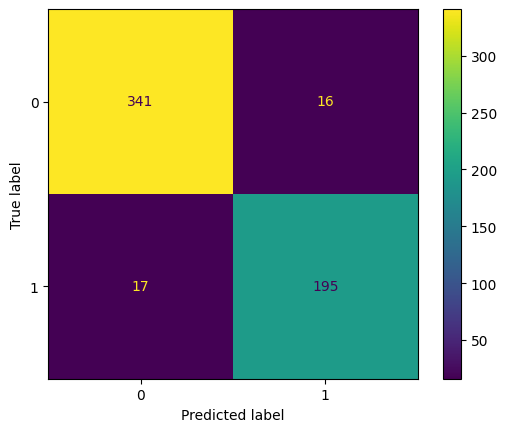

Accuracy: 0.9297469337059463
Sensitivity:  0.9198113207547169
specificity:  0.9551820728291317
F-1 score:  0.921985815602837


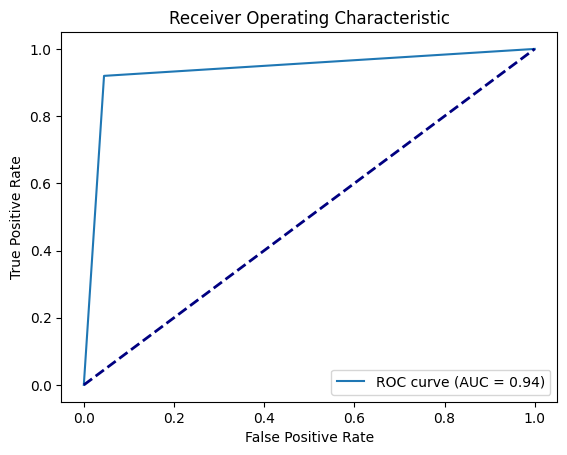

rf


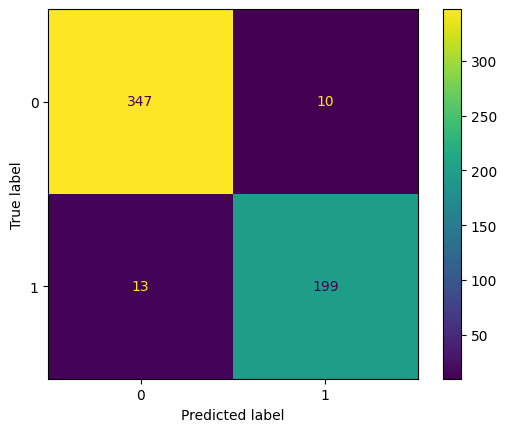

Accuracy: 0.9595714951094549
Sensitivity:  0.9386792452830188
specificity:  0.9719887955182073
F-1 score:  0.9453681710213777


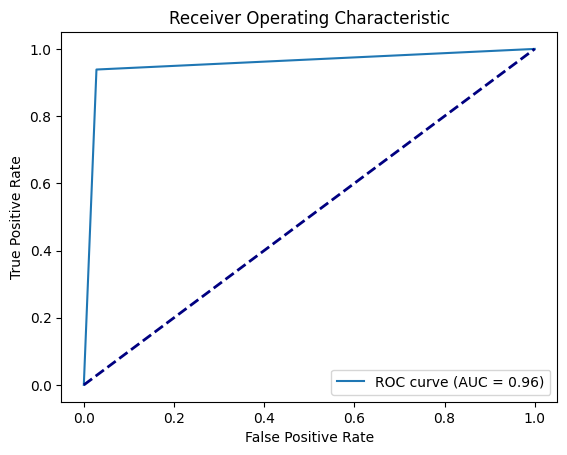

ada


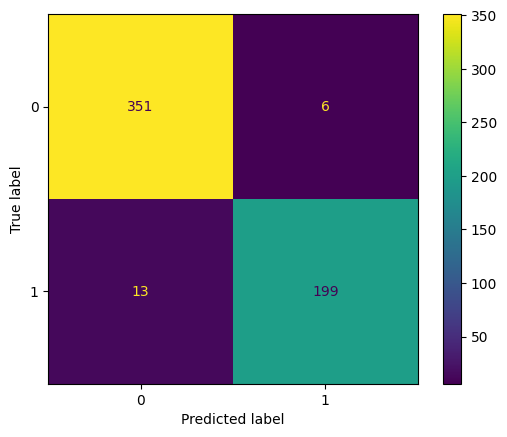

Accuracy: 0.9665579878900792
Sensitivity:  0.9386792452830188
specificity:  0.9831932773109243
F-1 score:  0.9544364508393285


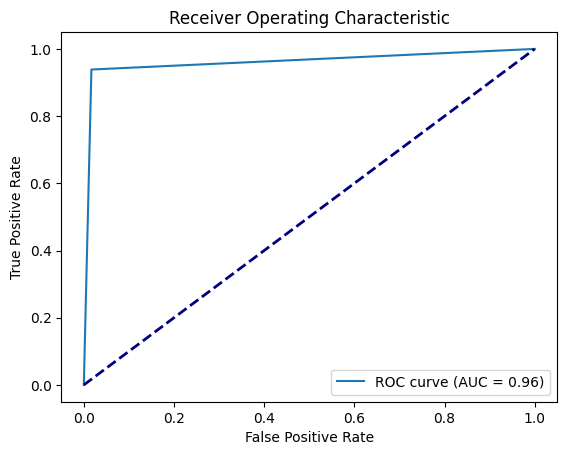

gb


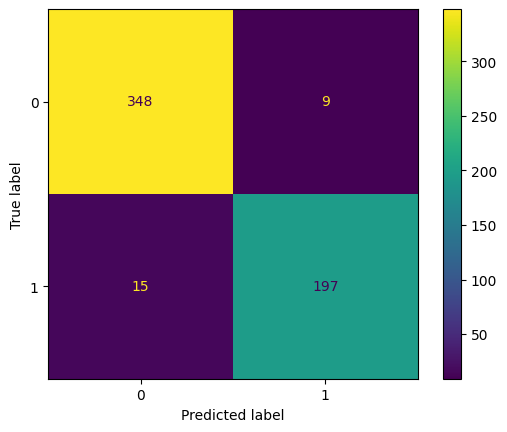

Accuracy: 0.9578326346840553
Sensitivity:  0.9292452830188679
specificity:  0.9747899159663865
F-1 score:  0.9425837320574162


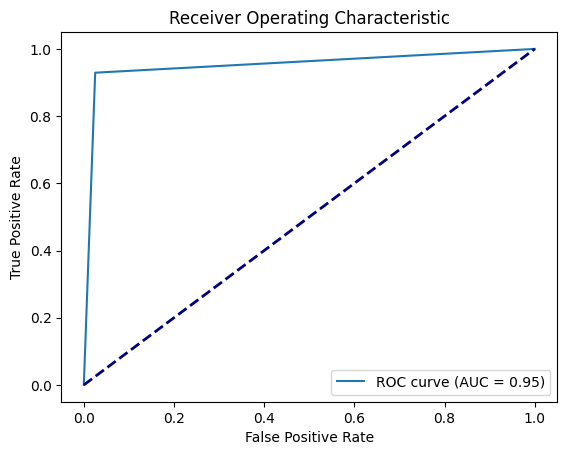

xgb


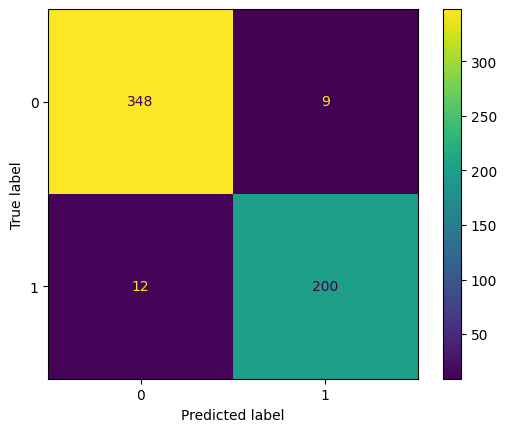

Accuracy: 0.9630802670392796
Sensitivity:  0.9433962264150944
specificity:  0.9747899159663865
F-1 score:  0.9501187648456059


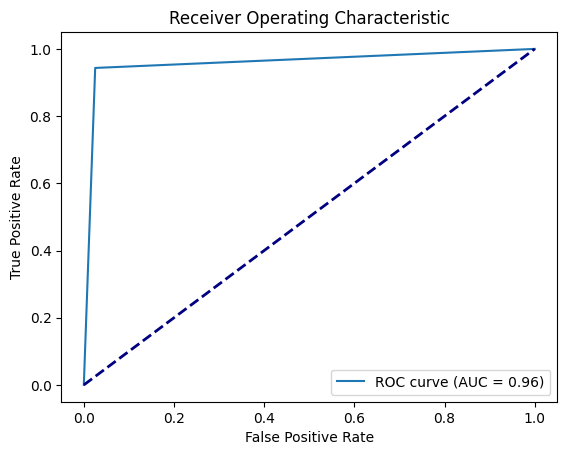

In [18]:
for val in all_clf:
    print(val)
    classify(all_clf[val], breast_cancer_data, encoded_target, kf)